# **Data Description**

You can get data from WHO : https://covid19.who.int/data

| Field name | Type | Description |
| --- | --- | --- |
| Date_reported | Date | Date of reporting to WHO |
| Country_code | String | ISO Alpha-2 country code |
| Country | String | Country, territory, area |
| WHO_region | String | WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO). |
| New_cases | Integer | New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.* |
| Cumulative_cases | Integer | Cumulative confirmed cases reported to WHO to date. |
| New_deaths | Integer | New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.* |
| Cumulative_deaths | Integer | Cumulative confirmed deaths reported to WHO to date. |

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()

# **Reading and Exploring Data**

In [ ]:
data = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [ ]:
data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268995 entries, 0 to 268994
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      268995 non-null  object
 1   Country_code       267860 non-null  object
 2   Country            268995 non-null  object
 3   WHO_region         268995 non-null  object
 4   New_cases          268995 non-null  int64 
 5   Cumulative_cases   268995 non-null  int64 
 6   New_deaths         268995 non-null  int64 
 7   Cumulative_deaths  268995 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.4+ MB


In [ ]:
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.689950e+05,2.689950e+05,268995.000000,2.689950e+05
mean,2.808178e+03,1.120640e+06,25.403402,1.572540e+04
std,4.019824e+04,5.293001e+06,154.646330,6.849147e+04
min,-3.072000e+04,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,1.055000e+03,0.000000,1.000000e+01
50%,1.500000e+01,2.466200e+04,0.000000,2.970000e+02
75%,4.050000e+02,3.062050e+05,4.000000,4.621000e+03
max,6.966046e+06,1.012115e+08,22973.000000,1.100421e+06


In [ ]:
# change float format in description
pd.options.display.float_format = '{:,.0f}'.format
data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,"268,995","268,995","268,995","268,995"
mean,"2,808","1,120,640",25,"15,725"
std,"40,198","5,293,001",155,"68,491"
min,"-30,720",0,"-2,437",0
25%,0,"1,055",0,10
50%,15,"24,662",0,297
75%,405,"306,205",4,"4,621"
max,"6,966,046","101,211,478","22,973","1,100,421"


# Duplicate Values

In [ ]:
# check duplicates

data.duplicated().sum()

0

# Missing Values

In [ ]:
# Check Missing Values

data.isnull().sum()

Date_reported           0
Country_code         1135
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [ ]:
round(data.isnull().mean() * 100, 2)

Date_reported       0
Country_code        0
Country             0
WHO_region          0
New_cases           0
Cumulative_cases    0
New_deaths          0
Cumulative_deaths   0
dtype: float64

# Rename Columns

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.sample(3)

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
135050,2023-01-27,LR,Liberia,AFRO,0,8062,0,294
16980,2022-12-28,BS,Bahamas,AMRO,0,37491,0,833
1508,2021-01-10,AL,Albania,EURO,673,62378,7,1230


# Date_reported

In [ ]:
data.date_reported.dtype

dtype('O')

In [ ]:
data.date_reported.describe()

count         268995
unique          1135
top       2020-01-03
freq             237
Name: date_reported, dtype: object

In [ ]:
data.date_reported.min(), data.date_reported.max()

('2020-01-03', '2023-02-10')

In [ ]:
# change date_reported column to datetime

data['date_reported'] = pd.to_datetime(data['date_reported'])

In [ ]:
data['date_reported'].dtype

dtype('<M8[ns]')

In [ ]:
data['date_reported'].dtype.type

numpy.datetime64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268995 entries, 0 to 268994
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      268995 non-null  datetime64[ns]
 1   country_code       267860 non-null  object        
 2   country            268995 non-null  object        
 3   who_region         268995 non-null  object        
 4   new_cases          268995 non-null  int64         
 5   cumulative_cases   268995 non-null  int64         
 6   new_deaths         268995 non-null  int64         
 7   cumulative_deaths  268995 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 16.4+ MB


In [ ]:
# Available now
data.date_reported.max() - data.date_reported.min()

Timedelta('1134 days 00:00:00')

In [ ]:
total_period = data.date_reported.max() - data.date_reported.min()
# change to years, months, days
total_years = total_period / np.timedelta64(1, 'Y')
total_months = total_period / np.timedelta64(1, 'M')
total_days = total_period / np.timedelta64(1, 'D')

print(f'Total period: {total_period}')
print(f'Total years: {total_years}')
print(f'Total months: {total_months}')
print(f'Total days: {total_days}')

Total period: 1134 days 00:00:00
Total years: 3.1047865459249677
Total months: 37.25743855109961
Total days: 1134.0


In [ ]:
from dateutil.relativedelta import relativedelta

relativedelta(data.date_reported.max(), data.date_reported.min())

relativedelta(years=+3, months=+1, days=+7)

In [ ]:
from datetime import datetime

# Get the current date
current_date = datetime.now()
current_date

datetime.datetime(2023, 2, 11, 14, 3, 33, 301335)

In [ ]:
relativedelta(current_date, data.date_reported.max())

relativedelta(days=+1, hours=+14, minutes=+3, seconds=+33, microseconds=+301335)

# Country_code and Country

In [ ]:
data.country_code.nunique()

236

In [ ]:
data.country.nunique()

237

In [ ]:
# The column of 'country_code' is unnecessary so we drop it

data.drop(['country_code'], axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

date_reported        0
country              0
who_region           0
new_cases            0
cumulative_cases     0
new_deaths           0
cumulative_deaths    0
dtype: int64

In [ ]:
# I'm interested in Egypt

'Egypt' in data['country'].unique()

True

# Filter by Country and Date_Reported

In [ ]:
data.sample(3)

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
193267,2020-11-15,Qatar,EMRO,203,135570,0,234
28604,2020-08-19,Bonaire,AMRO,0,5,0,0
268232,2021-01-09,Zimbabwe,AFRO,985,19660,22,468


In [ ]:
data[data.country == 'Egypt'].shape

(1135, 7)

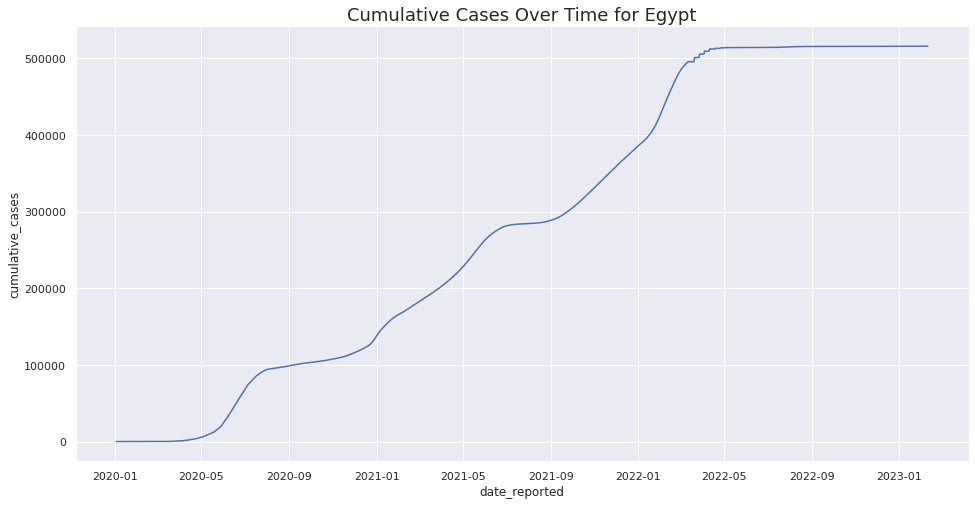

In [ ]:
# plot cumulative cases over time 
plt.figure(figsize = (16,8))
sns.lineplot(data = data[data.country == 'Egypt'], x = 'date_reported', y = 'cumulative_cases')
plt.title('Cumulative Cases Over Time for Egypt', size = 18)
plt.show()

In [ ]:
# plotly express
px.line(data[data.country == 'Egypt'], x = 'date_reported', y = 'cumulative_cases', 
       title = 'Cumulative Cases Over Time for Egypt', width = 990, height = 600, markers = True)

In [ ]:
# This is a function for exploring cumulative cases for a specific country

def cumulative_cases(country):
    fig = px.line(data[data.country == country], x = 'date_reported', y = 'cumulative_cases', 
                  title = f'Cumulative Cases Over Time for {country}', width = 990, height = 600, markers = True)
    fig.show()

In [ ]:
cumulative_cases('Egypt')

In [ ]:
cumulative_cases('United States of America')

In [ ]:
# This is a function for exploring cumulative deaths for a specific country

def cumulative_deaths(country):
    fig = px.line(data[data.country == country], x = 'date_reported', y = 'cumulative_deaths', 
                  title = f'Cumulative Deaths Over Time for {country}', width = 990, height = 600, markers = True)
    fig.show()

In [ ]:
cumulative_deaths('Egypt')

In [ ]:
# This is a function for exploring cumulative cases for a specific country over specific period

def cumulative_cases_period(country, start_date, end_date):
    d = data[(data.country == country) & (data.date_reported >= start_date) & (data.date_reported <= end_date)]
    fig = px.line(d, x = 'date_reported', y = 'cumulative_cases', 
                  title = f'Cumulative Cases of {country} from {start_date} to {end_date}',
                  width = 990, height = 600, markers = True)
    fig.show()

In [ ]:
cumulative_cases_period('Egypt', '2020-05-01', '2022-08-28')

In [ ]:
# This is a function for exploring cumulative deaths for a specific country over specific period

def cumulative_deaths_period(country, start_date, end_date):
    d = data[(data.country == country) & (data.date_reported >= start_date) & (data.date_reported <= end_date)]
    fig = px.line(d, x = 'date_reported', y = 'cumulative_deaths', 
                  title = f'Cumulative Deaths of {country} from {start_date} to {end_date}',
                  width = 990, height = 600, markers = True)
    fig.show()

In [ ]:
cumulative_deaths_period('Egypt', '2021-02-15', '2021-09-15')

In [ ]:
# This is a general function for exploring the cases and the deaths of a specific country over a specific period 

def general_cases_deaths(status, country, start_date = data.date_reported.min(), end_date = data.date_reported.max()):
    d = data[(data.country == country) & (data.date_reported >= start_date) & (data.date_reported <= end_date)]
    fig = px.line(d, x = 'date_reported', y = status, 
                  title = f'{status} of {country} from {start_date} to {end_date}',
                  width = 990, height = 600, markers = True)
    fig.show()

In [ ]:
general_cases_deaths('new_cases', 'Egypt', '2021-03-10', '2021-11-23')

In [ ]:
general_cases_deaths('new_cases', 'Egypt')

# Filter by Year and Month

In [ ]:
data['year'] = data.date_reported.dt.year
data['month'] = data.date_reported.dt.month

In [ ]:
data.head()

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month
0,2020-01-03,Afghanistan,EMRO,0,0,0,0,2020,1
1,2020-01-04,Afghanistan,EMRO,0,0,0,0,2020,1
2,2020-01-05,Afghanistan,EMRO,0,0,0,0,2020,1
3,2020-01-06,Afghanistan,EMRO,0,0,0,0,2020,1
4,2020-01-07,Afghanistan,EMRO,0,0,0,0,2020,1


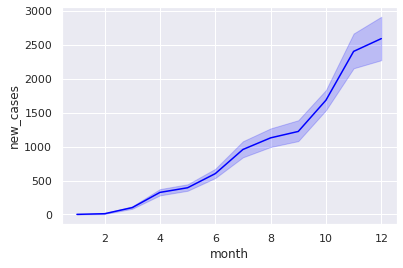

In [ ]:
sns.lineplot(data = data[data.year == 2020], x = 'month', y = 'new_cases', color = 'blue');

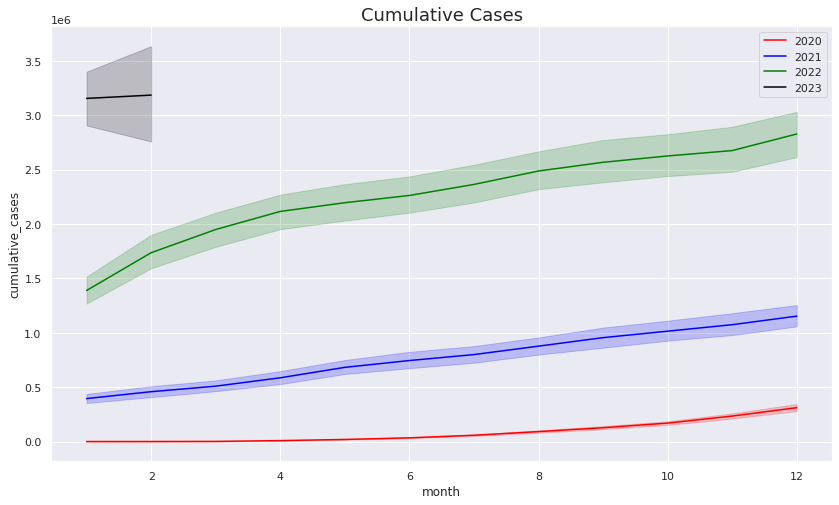

In [ ]:
# plot cumulative cases for each year
plt.figure(figsize = (14, 8))
sns.lineplot(data = data[data.year == 2020], x = 'month', y = 'cumulative_cases', color = 'red')
sns.lineplot(data = data[data.year == 2021], x = 'month', y = 'cumulative_cases', color = 'blue')
sns.lineplot(data = data[data.year == 2022], x = 'month', y = 'cumulative_cases', color = 'green')
sns.lineplot(data = data[data.year == 2023], x = 'month', y = 'cumulative_cases', color = 'black')
plt.legend(['2020', '2021', '2022', '2023'], loc = 'upper right')
plt.title('Cumulative Cases', size = 18)
plt.show()

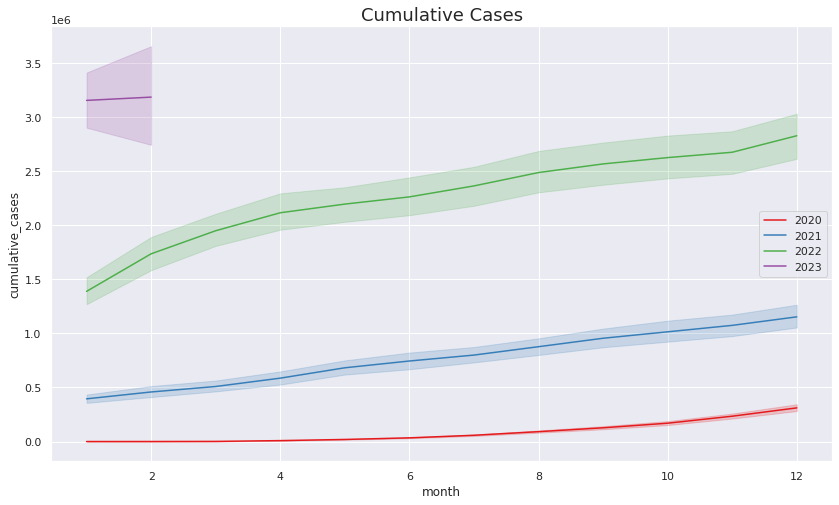

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data = data, x = 'month', y = 'cumulative_cases', hue = 'year', palette = 'Set1')
plt.legend(loc = 'center right')
plt.title('Cumulative Cases', size = 18)
plt.show()

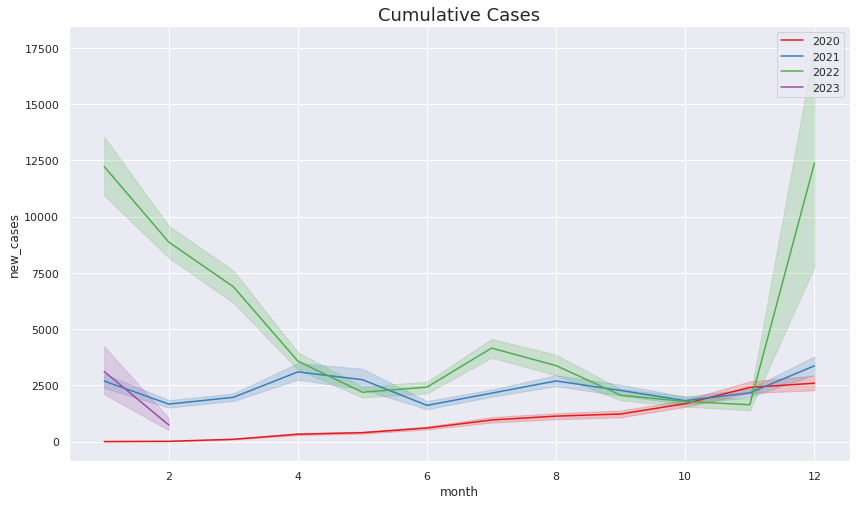

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data = data, x = 'month', y = 'new_cases', hue = 'year', palette = 'Set1')
plt.legend(loc = 'upper right')
plt.title('Cumulative Cases', size = 18)
plt.show()

# Total Cases (Filter by Specific Year)

In [ ]:
data[data.year == 2022].groupby('month')['new_cases'].mean()

month
1    12,228
2     8,869
3     6,885
4     3,577
5     2,192
6     2,420
7     4,156
8     3,376
9     2,060
10    1,781
11    1,636
12   12,375
Name: new_cases, dtype: float64

In [ ]:
data[data.year == 2022].groupby('month')['new_cases'].sum().astype(float)

month
1    89,840,527
2    58,854,781
3    50,580,826
4    25,429,711
5    16,105,393
6    17,206,803
7    30,535,422
8    24,801,599
9    14,647,557
10   13,088,570
11   11,634,258
12   90,922,109
Name: new_cases, dtype: float64

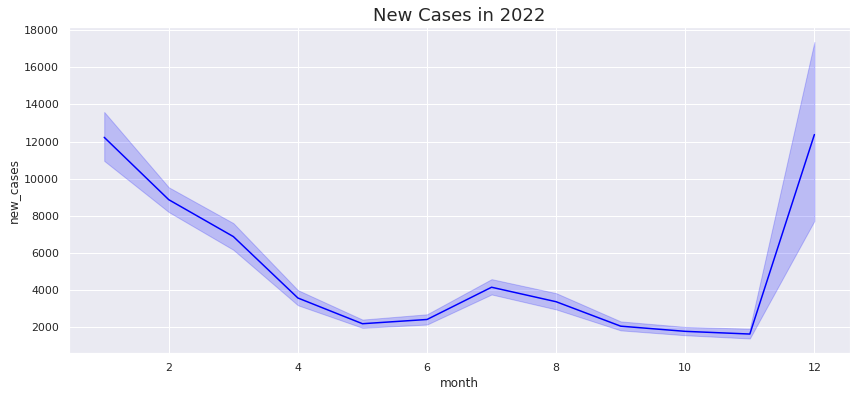

In [ ]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = data[data.year == 2022], x = 'month', y = 'new_cases', color = 'blue')
plt.title('New Cases in 2022', size = 18)
plt.show()

In [ ]:
data.groupby('year')['new_cases'].sum().astype(float)

year
2020    82,936,215
2021   204,174,642
2022   443,647,556
2023    24,627,296
Name: new_cases, dtype: float64

In [ ]:
data.groupby(['year', 'month'])['new_cases'].mean()

year  month
2020  1            1
      2           11
      3          101
      4          326
      5          394
      6          602
      7          959
      8        1,130
      9        1,225
      10       1,686
      11       2,406
      12       2,595
2021  1        2,690
      2        1,665
      3        1,967
      4        3,097
      5        2,750
      6        1,608
      7        2,152
      8        2,695
      9        2,271
      10       1,819
      11       2,166
      12       3,367
2022  1       12,228
      2        8,869
      3        6,885
      4        3,577
      5        2,192
      6        2,420
      7        4,156
      8        3,376
      9        2,060
      10       1,781
      11       1,636
      12      12,375
2023  1        3,114
      2          737
Name: new_cases, dtype: float64

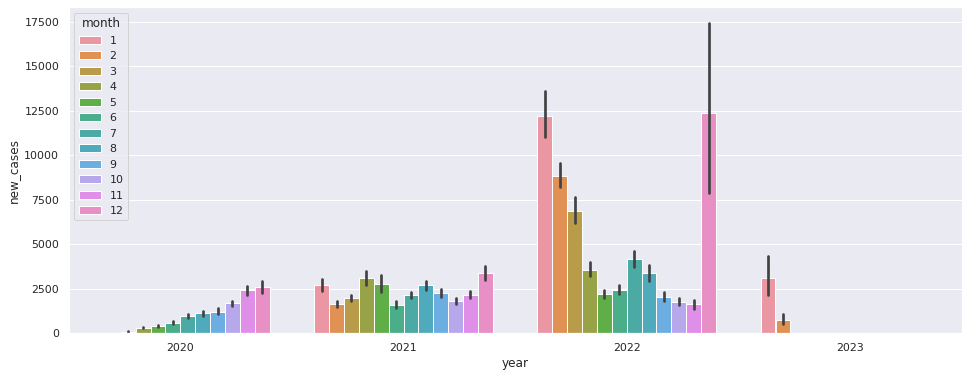

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(data = data, x = 'year', y = 'new_cases', hue = 'month');

In [ ]:
data.groupby('year')['new_cases'].mean()

year
2020     961
2021   2,360
2022   5,129
2023   2,534
Name: new_cases, dtype: float64

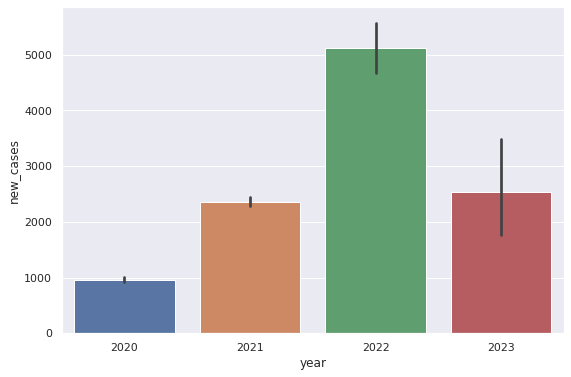

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(data = data, x = 'year', y = 'new_cases');

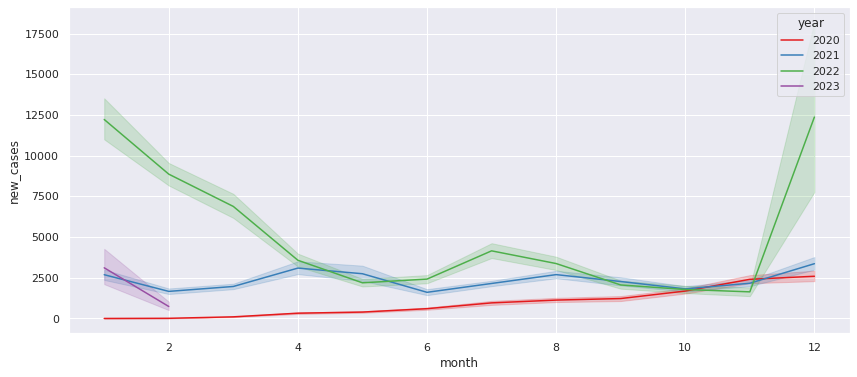

In [ ]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = data, x = 'month', y = 'new_cases', hue = 'year', palette = 'Set1')

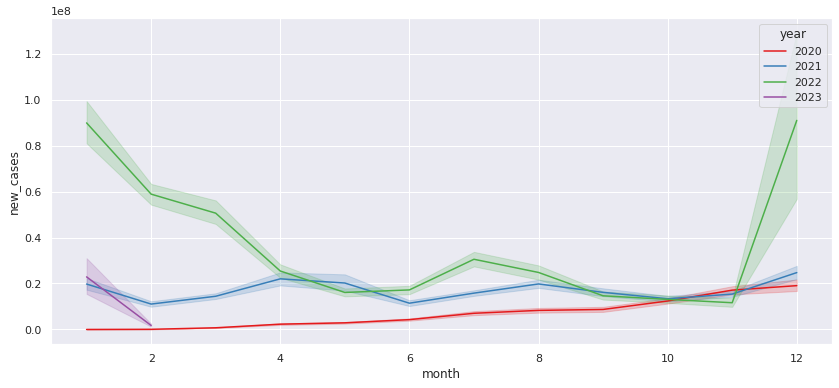

In [ ]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = data, x = 'month', y = 'new_cases', hue = 'year', palette = 'Set1', estimator = np.sum)

In [ ]:
data['month_year'] = data.date_reported.dt.to_period('M').astype(str)

In [ ]:
data.sample(3)

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
62833,2021-02-14,Democratic Republic of the Congo,AFRO,55,24294,0,692,2021,2,2021-02
8757,2022-03-25,Antigua and Barbuda,AMRO,0,7482,0,135,2022,3,2022-03
243365,2021-04-22,Tokelau,WPRO,0,0,0,0,2021,4,2021-04


In [ ]:
px.histogram(data, x = 'month_year', y = 'new_cases', color = 'year', title = 'New Cases Over Time')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
px.histogram(data[data.country == 'Egypt'], x = 'month_year', y = 'new_cases', color = 'year', nbins = 50,
             title = 'New Cases Over Time in Egypt')

In [ ]:
def total_cases_country(country, start_date = data.date_reported.min(), end_date = data.date_reported.max()):
    d = data[data.country == country]
    fig = px.histogram(d, x = 'month_year', y = 'new_cases', color = 'year', nbins = 50,
                       title = f'Totle Cases for {country}', range_x = [start_date, end_date])
    fig.show()

In [ ]:
total_cases_country('Egypt')

In [ ]:
total_cases_country('Egypt', '2021-3', '2022-9')

In [ ]:
total_cases_country('Egypt', '2021-03-25', '2022-11-19')

# Total Cases (Filter by Region)

In [ ]:
data.who_region.unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

In [ ]:
data[data.who_region == 'EMRO'].country.unique()

array(['Afghanistan', 'Bahrain', 'Djibouti', 'Egypt',
       'Iran (Islamic Republic of)', 'Iraq', 'Jordan', 'Kuwait',
       'Lebanon', 'Libya', 'Morocco',
       'occupied Palestinian territory, including east Jerusalem', 'Oman',
       'Pakistan', 'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan',
       'Syrian Arab Republic', 'Tunisia', 'United Arab Emirates', 'Yemen'],
      dtype=object)

In [ ]:
data.groupby('who_region')['new_cases'].sum().astype(float).sort_values(ascending = False)

who_region
EURO    272,254,360
WPRO    200,392,858
AMRO    189,244,473
SEARO    60,759,906
EMRO     23,247,286
AFRO      9,486,062
Other           764
Name: new_cases, dtype: float64

In [ ]:
px.bar(data.groupby('who_region')['new_cases'].sum().astype(float).sort_values(ascending = False),
       title = 'New Cases of Who Region')

In [ ]:
def total_cases_region(region, start_date = data.date_reported.min(), end_date = data.date_reported.max()):
    d = data[data.who_region == region]
    fig = px.histogram(d, x = 'month_year', y = 'new_cases', color = 'year', nbins = 50,
                       title = f'Totle Cases for {region}', range_x = [start_date, end_date])
    fig.show()

In [ ]:
total_cases_region('EMRO')

# Filter by Top Countries

In [ ]:
px.bar(data.groupby('country')['new_cases'].sum().sort_values(ascending = False), 
       title = 'Top Cases by Country', width=990, height=800)

In [ ]:
px.bar(data.groupby('country')['cumulative_cases'].max().sort_values(ascending = False), 
       title = 'Top Cumulative Cases by Country', width=990, height=800)

In [ ]:
px.bar(data[data.who_region == 'EMRO'].groupby('country')['cumulative_cases'].max().sort_values(ascending = False),
       title = 'Top Cumulative Cases by Country in EMRO Region', width = 990, height = 700)

In [ ]:
fig = px.bar(data[data.who_region == 'EMRO'].groupby('country')['cumulative_deaths'].max().sort_values(ascending = False),
       title = 'Top Cumulative Deaths by Country in EMRO Region', width = 990, height = 700)
fig.update(layout_showlegend = False)
fig.show()

In [ ]:
# max_new_case = data[data.new_cases == data.new_cases.max()]

max_new_case = data.query('new_cases == new_cases.max()') 
max_new_case

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
48755,2022-12-23,China,WPRO,6966046,50447985,628,34588,2022,12,2022-12


In [ ]:
max_new_case['country']

48755    China
Name: country, dtype: object

In [ ]:
country = max_new_case['country'].iloc[0]
country

'China'

In [ ]:
max_new_case['date_reported'].dt.strftime('%d-%m-%Y')

48755    23-12-2022
Name: date_reported, dtype: object

In [ ]:
date = max_new_case['date_reported'].dt.strftime('%d-%m-%Y').iloc[0]
date

'23-12-2022'

In [ ]:
print(f'The country with the most new cases is {country}')
print(f'The date with the most new cases is {date}')

The country with the most new cases is China
The date with the most new cases is 23-12-2022


### Top 10 Countries have the most  New Cases in world

In [ ]:
data.groupby('country')['new_cases'].max().nlargest(10).astype(float)

country
China                      6,966,046
United States of America   1,265,520
Republic of Korea            621,328
France                       500,563
Viet Nam                     454,212
India                        414,188
Türkiye                      406,321
Netherlands                  391,644
Japan                        326,090
Germany                      307,898
Name: new_cases, dtype: float64

In [ ]:
fig = px.bar(data.groupby('country')['new_cases'].max().nlargest(10), 
             title = 'Top 10 Countries have the most New Cases in world', width = 990, height = 600)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Countries', yaxis_title = 'New Cases')
fig.show()

### Top 10 Countries have the most New Cases in the  EMRO region

In [ ]:
data[data.who_region == 'EMRO'].groupby('country')['new_cases'].max().nlargest(10).astype(float)

country
Iran (Islamic Republic of)                                 50,228
Tunisia                                                    27,340
Jordan                                                     25,502
Iraq                                                       13,515
Morocco                                                    12,039
occupied Palestinian territory, including east Jerusalem   11,016
Lebanon                                                    10,760
Pakistan                                                    8,183
Bahrain                                                     8,173
Kuwait                                                      6,913
Name: new_cases, dtype: float64

In [ ]:
fig = px.bar(data[data.who_region == 'EMRO'].groupby('country')['new_cases'].max().nlargest(10), 
             title = 'Top 10 Countries have the most New Cases in the EMRO region', width = 990, height = 600)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Countries', yaxis_title = 'New Cases')
fig.show()

### Top 10 countries have the most New Deaths in world

In [ ]:
data.groupby('country')['new_deaths'].max().nlargest(10).astype(float)

country
China                      22,973
Chile                      11,447
Ecuador                     8,786
Japan                       7,299
India                       6,148
United States of America    5,061
Brazil                      4,249
Kazakhstan                  2,291
Indonesia                   2,069
France                      2,003
Name: new_deaths, dtype: float64

In [ ]:
fig = px.bar(data.groupby('country')['new_deaths'].max().nlargest(10).sort_values(ascending = True),
         title='Top 10 Countries with the most New Deaths in world', width=800, height=600, orientation='h')
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Country', yaxis_title = 'New Deaths')
fig.show()

### Top 10 Countries with the most New Deaths in the EMRO region

In [ ]:
data[data.who_region == 'EMRO'].groupby('country')['new_deaths'].max().nlargest(10).astype(float)

country
Sudan                        951
Iran (Islamic Republic of)   709
Lebanon                      351
Tunisia                      348
Pakistan                     313
Afghanistan                  159
Morocco                      152
Oman                         123
Iraq                         122
Jordan                       111
Name: new_deaths, dtype: float64

In [ ]:
fig = px.bar(data[data.who_region == 'EMRO'].groupby('country')['new_deaths'].max().nlargest(10).sort_values(ascending = True),
         title='Top 10 Countries with the most New Deaths in world', width=800, height=600, orientation='h')
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Country', yaxis_title = 'New Deaths')
fig.show()

In [ ]:
# This is a general function for exploring Top 10 Countries in any columns

def top_10_countries_in_world(column):
    fig = px.bar(data.groupby('country')[column].max().nlargest(10),
                 title = f'Top 10 Countries have the most {column} in world', width = 990, height = 600)
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = 'Country', yaxis_title = column)
    fig.show()
    
    
def top_10_countries_in_region(region, column):
    fig = px.bar(data[data.who_region == region].groupby('country')[column].max().nlargest(10),
                 title = f'Top 10 Countries have the most {column} in the {region} region', width = 990, height = 600)
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = 'Country', yaxis_title = column)
    fig.show()

In [ ]:
top_10_countries_in_world('new_cases')

In [ ]:
top_10_countries_in_region('EMRO', 'new_cases')

In [ ]:
top_10_countries_in_region('EMRO', 'new_deaths')

In [ ]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ('New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths'))

fig.add_trace(go.Bar(x = data.groupby('country')['new_cases'].max().nlargest(10).index, 
                     y = data.groupby('country')['new_cases'].max().nlargest(10).values), row = 1, col = 1)

fig.add_trace(go.Bar(x = data.groupby('country')['new_deaths'].max().nlargest(10).index, 
                     y = data.groupby('country')['new_deaths'].max().nlargest(10).values), row = 1, col = 2)

fig.add_trace(go.Bar(x = data.groupby('country')['cumulative_cases'].max().nlargest(10).index, 
                     y = data.groupby('country')['cumulative_cases'].max().nlargest(10).values), row = 2, col = 1)

fig.add_trace(go.Bar(x = data.groupby('country')['cumulative_deaths'].max().nlargest(10).index, 
                     y = data.groupby('country')['cumulative_deaths'].max().nlargest(10).values), row = 2, col = 2)

fig.update(layout_showlegend = False)
fig.update_layout(height = 900, width = 980, title_text = 'Top 10 Countries have the most Cases and Deaths in world')
fig.show()

# More Analysis

## Task 1: Create a new column called 'season' that specify {'Winter', 'Spring', 'Summer', 'Autumn'}

In [ ]:
# create season column 
def season(month):
    if month in [1, 2, 3]:
        return 'Winter'
    if month in [4, 5, 6]:
        return 'Spring'
    if month in [7, 8, 9]:
        return 'Summer'
    else:
        return 'Autumn'
    
data['season'] = data['month'].apply(season)
data.sample(3)

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year,season
23496,2022-03-09,Belize,AMRO,0,56876,0,651,2022,3,2022-03,Winter
59539,2021-06-05,Cyprus,EURO,83,73831,1,371,2021,6,2021-06,Spring
148788,2020-04-15,Mauritania,AFRO,0,7,0,149,2020,4,2020-04,Spring


## Task 2: Filter by 'season': Find Total Deaths and Total new cases per season. Visualize it

In [ ]:
total_deaths = data.groupby('season')['new_deaths'].sum().astype(float)
total_deaths

season
Autumn   1,644,140
Spring   1,712,365
Summer   1,570,198
Winter   1,906,685
Name: new_deaths, dtype: float64

In [ ]:
fig = px.bar(total_deaths, title = 'Total Deaths per season', width = 700, height = 600)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Seasons', yaxis_title = 'Total Deaths')
fig.show()

In [ ]:
total_cases = data.groupby('season')['new_cases'].sum().astype(float)
total_cases

season
Autumn   217,697,495
Spring   121,892,731
Summer   145,801,113
Winter   269,994,370
Name: new_cases, dtype: float64

In [ ]:
fig = px.bar(total_cases, title = 'Total Cases per season', width = 700, height = 600)
fig.update(layout_showlegend = False)
fig.update_layout(xaxis_title = 'Seasons', yaxis_title = 'Total Cases')
fig.show()

## Task 3: Filter by 'region' and 'season' : Find Total Deaths and Total new cases per season. Visualize it

In [ ]:
total_deaths_by_region = data.groupby(['who_region', 'season'])['new_deaths'].sum().astype(float)
total_deaths_by_region

who_region  season
AFRO        Autumn    24,024
            Spring    28,508
            Summer    71,661
            Winter    51,077
AMRO        Autumn   557,833
            Spring   792,922
            Summer   733,663
            Winter   834,833
EMRO        Autumn    86,684
            Spring    82,497
            Summer   114,528
            Winter    65,680
EURO        Autumn   769,050
            Spring   451,039
            Summer   263,984
            Winter   702,484
Other       Autumn         0
            Spring         2
            Summer         0
            Winter        11
SEARO       Autumn   120,163
            Spring   302,626
            Summer   287,500
            Winter    93,453
WPRO        Autumn    86,386
            Spring    54,771
            Summer    98,862
            Winter   159,147
Name: new_deaths, dtype: float64

In [ ]:
def total_deaths_by_region(region):
    fig = px.bar(data[data.who_region == region].groupby('season')['new_deaths'].sum(), 
                 title = f'Total Deaths per season in {region}', width = 700, height = 600)
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = 'Seasons', yaxis_title = 'Total Deaths')
    fig.show()

In [ ]:
total_deaths_by_region('EMRO')

In [ ]:
total_deaths_by_region('EURO')

In [ ]:
total_cases_by_region = data.groupby(['who_region', 'season'])['new_cases'].sum().astype(float)
total_cases_by_region

who_region  season
AFRO        Autumn     2,094,112
            Spring     1,760,912
            Summer     3,084,545
            Winter     2,546,493
AMRO        Autumn    40,872,602
            Spring    33,564,823
            Summer    44,488,557
            Winter    70,318,491
EMRO        Autumn     4,065,104
            Spring     4,902,839
            Summer     7,187,627
            Winter     7,091,716
EURO        Autumn    68,458,582
            Spring    39,111,185
            Summer    43,828,292
            Winter   120,856,301
Other       Autumn             4
            Spring            48
            Summer             0
            Winter           712
SEARO       Autumn     7,414,474
            Spring    22,262,131
            Summer    16,068,149
            Winter    15,015,152
WPRO        Autumn    94,792,617
            Spring    20,290,793
            Summer    31,143,943
            Winter    54,165,505
Name: new_cases, dtype: float64

In [ ]:
def total_cases_by_region(region):
    fig = px.bar(data[data.who_region == region].groupby('season')['new_cases'].sum(), 
                 title = f'Total Cases per season in {region}', width = 700, height = 600)
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = 'Seasons', yaxis_title = 'Total Cases')
    fig.show()

In [ ]:
total_cases_by_region('EMRO')

In [ ]:
total_cases_by_region('AMRO')

In [ ]:
# A general function for exploring Total Deaths and Total New Cases per season by Region
def total_cases_deaths_by_region(region, column):
    fig = px.bar(data[data.who_region == region].groupby('season')[column].sum(), 
                 title = f'Total {column} per season in {region}', width = 700, height = 600)
    fig.update(layout_showlegend = False)
    fig.update_layout(xaxis_title = 'Seasons', yaxis_title = f'Total {column}')
    fig.show()

In [ ]:
total_cases_deaths_by_region('EMRO', 'new_cases')

In [ ]:
total_cases_deaths_by_region('EMRO', 'new_deaths')

# Create Easy Maps

In [ ]:
data_all_max = data.groupby('country').max()
choromap_1 = px.choropleth(data_all_max, locations = data_all_max.index, locationmode = 'country names', 
              color = data_all_max['cumulative_cases'], title = 'Covid 19 Cases -->> "Worldwide Cumulative Cases"',
              color_continuous_scale = 'Reds')
choromap_1.show()

In [ ]:
data_2022_max = data[data.year == 2022].groupby('country').max()
choromap_2 = px.choropleth(data_2022_max, locations = data_2022_max.index, locationmode = 'country names', 
              color = data_all_max['cumulative_deaths'], title = 'Covid 19 Cases -->> "Worldwide Cumulative Deaths"',
              color_continuous_scale = 'Greens')
choromap_2.show()

# Save The Map

In [ ]:
choromap_1.write_html('choromap_1.html')

In [ ]:
choromap_2.write_html('choromap_2.html')

In [ ]:
def plot_map(data, column):
    data = dict(type = 'choropleth',
                locations = data.index,
                locationmode = 'country names',
                z = data[column],
                text = data.index,
                colorscale = 'agsunset',
                reversescale = False,
                marker = dict(line = dict(color = 'white', width = 1)),
               colorbar = {'title': column })

    layout = dict(title = f'Covid 19 Cases -->> "Worldwide {column}"',
                  geo = dict(showframe = False, projection = {'type': 'natural earth'}))

    choromap = go.Figure(data = [data], layout = layout)
    #choromap.update_layout(margin = {"r":0, "t":0, "l":0, "b":0})
    return(choromap)

In [ ]:
data_2020_max = data[data.year == 2020].groupby('country').max()
plot_map(data_2020_max, 'cumulative_deaths')

In [ ]:
choromap_3 = plot_map(data_2020_max, 'cumulative_deaths')
choromap_3.write_html('choromap_3.html')